In [1]:
import networkx as nx

In [89]:
g = nx.read_graphml("causality.graphml", node_type=str, edge_key_type=str, force_multigraph=True)

/opt/homebrew/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id id. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/opt/homebrew/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id labels. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/opt/homebrew/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id causal. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/opt/homebrew/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id label. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")


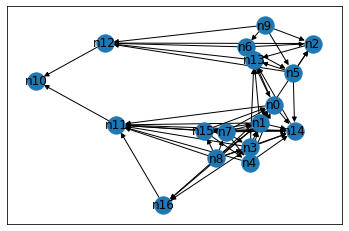

In [90]:
nx.draw_networkx(g, with_labels=True)

In [91]:
nodes = {old:node_data["id"] for old, node_data in dict(g.nodes(data=True)).items()}
nx.relabel_nodes(g, nodes, copy=False)

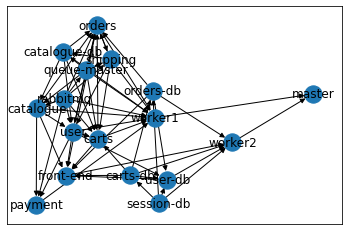

In [92]:
nx.draw_networkx(g, with_labels=True)

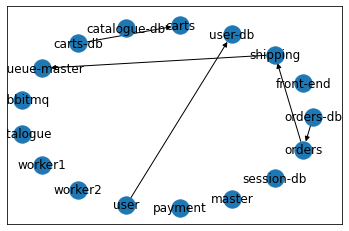

In [131]:
def is_gc_edge(n1, n2, k):
    return g[n1][n2][k]["label"] == 'CONNECTED' and g[n1][n2][k].get("causal", 'false') == 'true'
cgc = nx.subgraph_view(g, filter_edge=is_gc_edge)
nx.draw_networkx(cgc, nx.layout.circular_layout(cgc))

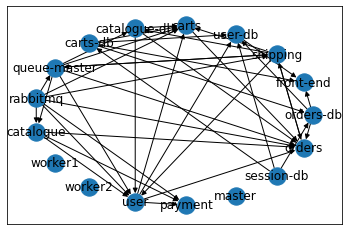

In [132]:
def is_gc_edge(n1, n2, k):
    return g[n1][n2][k].get("causal", 'false') == 'true'
cg = nx.subgraph_view(g, filter_edge=is_gc_edge)
nx.draw_networkx(cg, nx.layout.circular_layout(cg))

In [127]:
def build_causal_graph() -> nx.MultiDiGraph:
    g = nx.read_graphml("data/causality.graphml", node_type=str, edge_key_type=str, force_multigraph=True)
    nodes = {old:node_data["id"] for old, node_data in dict(g.nodes(data=True)).items()}
    nx.relabel_nodes(g, nodes, copy=False)  
    def is_gc_edge(n1, n2, k):
        return g[n1][n2][k]["label"] == 'CONNECTED' and g[n1][n2][k].get("causal", 'false') == 'true'
    cg = nx.subgraph_view(g, filter_edge=is_gc_edge)
    return cg

In [128]:
build_causal_graph()

/opt/homebrew/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id id. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/opt/homebrew/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id labels. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/opt/homebrew/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id causal. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/opt/homebrew/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id label. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")


In [129]:
cg

In [130]:
nx.closeness_centrality(cg)

{'orders-db': 0.0,
 'front-end': 0.0,
 'shipping': 0.08333333333333333,
 'user-db': 0.0625,
 'carts': 0.0625,
 'catalogue-db': 0.0,
 'carts-db': 0.0,
 'queue-master': 0.09375,
 'rabbitmq': 0.0,
 'catalogue': 0.0,
 'worker1': 0.0,
 'worker2': 0.0,
 'user': 0.0,
 'payment': 0.0,
 'master': 0.0,
 'session-db': 0.0,
 'orders': 0.0625}

In [121]:
nodes = sorted(cg.nodes)

In [122]:
for node in nodes:
    

['carts',
 'carts-db',
 'catalogue',
 'catalogue-db',
 'front-end',
 'master',
 'orders',
 'orders-db',
 'payment',
 'queue-master',
 'rabbitmq',
 'session-db',
 'shipping',
 'user',
 'user-db',
 'worker1',
 'worker2']

In [ ]:
nodes